In [96]:
import os 
import pandas as pd
import numpy as np
import matplotlib as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

In [97]:
Bibile_proper = pd.read_csv('Bibile, Monaragala_data.csv')
Bibile_proper

,HCHO reading,Location,Current Date,Next Date
0,0.000079,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,0.000146,"Bibile, Monaragala",2019-01-06,2019-01-07
...,...,...,...,...
1742,0.000057,"Bibile, Monaragala",2023-12-27,2023-12-28
1743,0.000057,"Bibile, Monaragala",2023-12-28,2023-12-29
1744,0.000057,"Bibile, Monaragala",2023-12-29,2023-12-30
1745,0.000057,"Bibile, Monaragala",2023-12-30,2023-12-31


In [98]:
drop_col = ['Location','Next Date']
Bibile_proper.drop(drop_col,axis=1, inplace=True)
Bibile_proper

,HCHO reading,Current Date
0,0.000079,2019-01-01
1,0.000019,2019-01-02
2,0.000028,2019-01-03
3,0.000037,2019-01-04
4,0.000146,2019-01-06
...,...,...
1742,0.000057,2023-12-27
1743,0.000057,2023-12-28
1744,0.000057,2023-12-29
1745,0.000057,2023-12-30


In [99]:
Bibile_proper['Current Date'] = pd.to_datetime(Bibile_proper['Current Date'])
Bibile_proper.dtypes

HCHO reading           float64
Current Date    datetime64[ns]
dtype: object

In [100]:
split_Bibile_proper = int(len(Bibile_proper) * 0.8)
Bibile_proper_train, Bibile_proper_test = Bibile_proper.iloc[:split_Bibile_proper], Bibile_proper.iloc[split_Bibile_proper:]

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-22811.611, Time=0.19 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-22336.151, Time=1.51 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-22874.140, Time=1.64 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-20698.923, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-22849.165, Time=0.66 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.55 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-22881.253, Time=3.63 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=7.43 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-22848.095, Time=2.31 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-22980.401, Time=4.75 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-22979.086, Time=2.49 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=10.11 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.75 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=-22944.324, Time=3.17 sec

c:\Users\sethr\Ana\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1397
Model:                 ARIMA(5, 0, 0)   Log Likelihood               11533.466
Date:                Sun, 21 Apr 2024   AIC                         -23052.932
Time:                        15:54:59   BIC                         -23016.237
Sample:                             0   HQIC                        -23039.213
                               - 1397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   5.27e-06     24.568      0.000       0.000       0.000
ar.L1          0.1709   1.48e-10   1.15e+09      0.000       0.171       0.171
ar.L2          0.1251   1.52e-10   8.22e+08      0.0

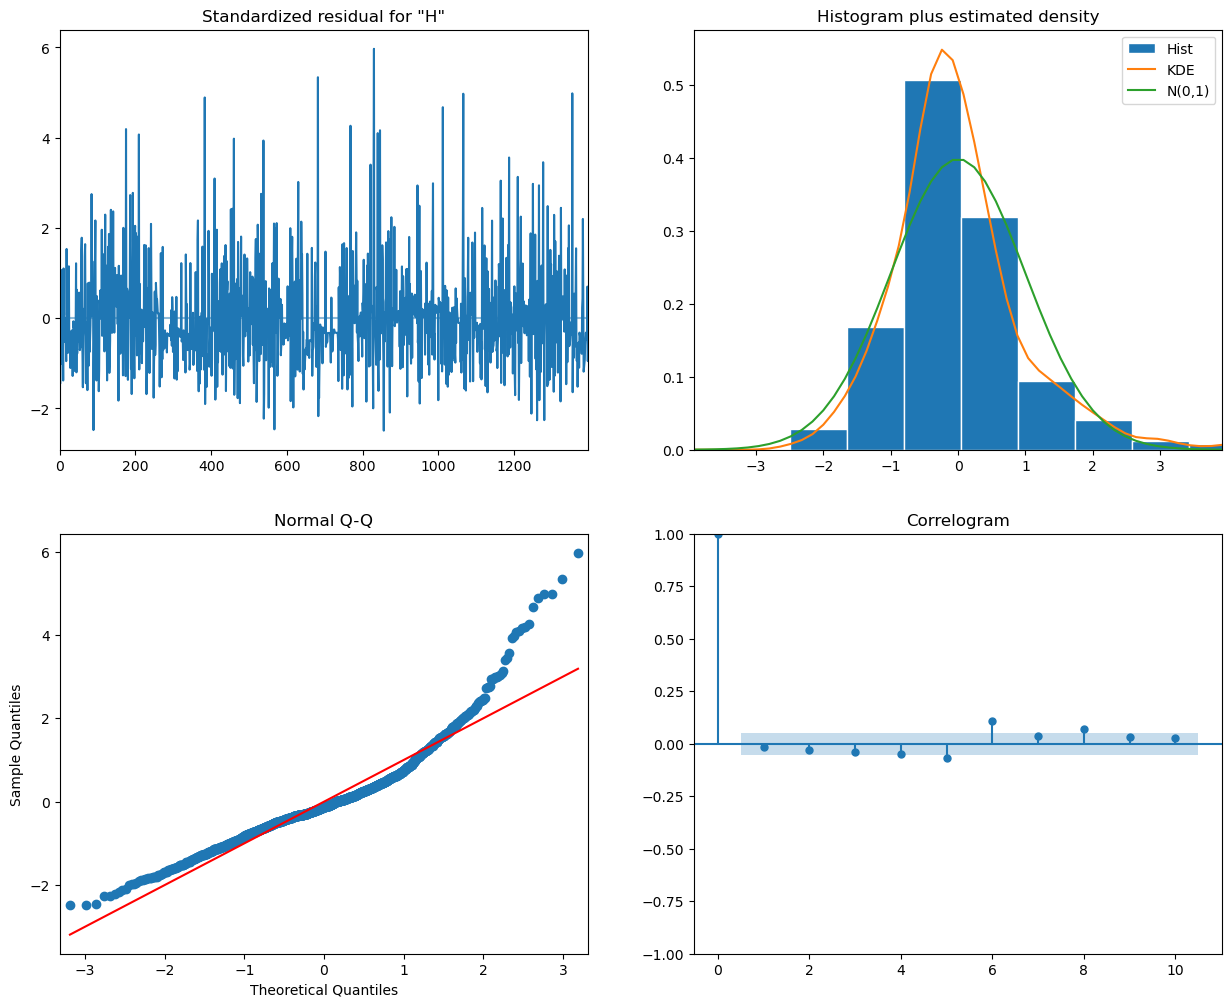

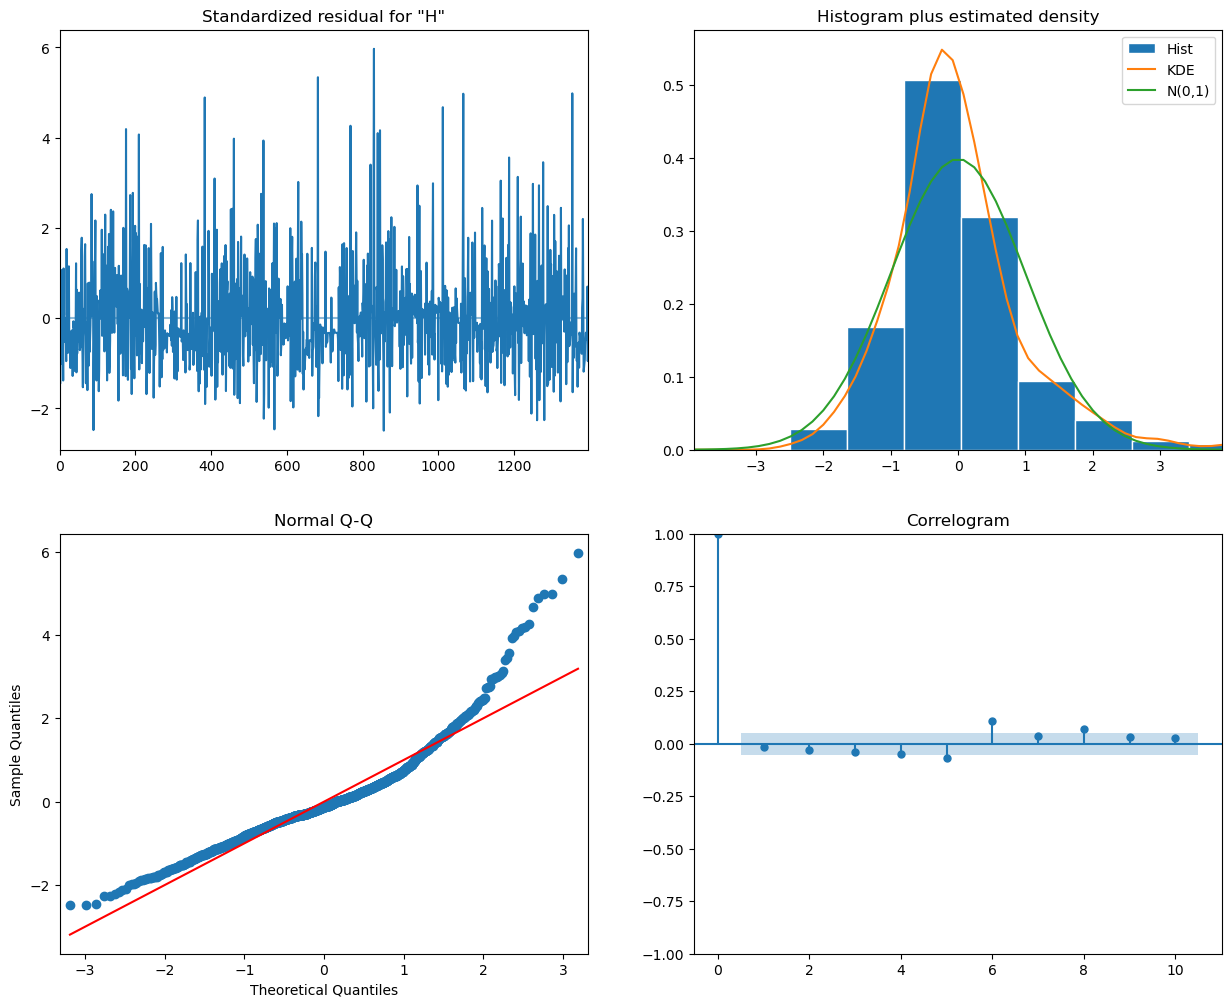

In [101]:
Bibile_proper_model = auto_arima(Bibile_proper_train['HCHO reading'], seasonal=True, trace=True, m=12)
p,d,q = Bibile_proper_model.order
print(p,d,q)
Bibile_proper_arima = ARIMA(Bibile_proper_train['HCHO reading'], order=(p,d,q))
Bibile_proper_arima_fit = Bibile_proper_arima.fit()
print(Bibile_proper_arima_fit.summary())
Bibile_proper_arima_fit.plot_diagnostics(figsize=(15,12))

In [102]:
Bibile_proper_test_preds_sarima = Bibile_proper_arima_fit.forecast(steps=len(Bibile_proper_test))
Bibile_proper_sarima_mse = mean_squared_error(Bibile_proper_test['HCHO reading'], Bibile_proper_test_preds_sarima)
print(f'ARIMA MSE for Bibile_proper: {Bibile_proper_sarima_mse}')
print(Bibile_proper_test_preds_sarima)

ARIMA MSE for Bibile_proper: 4.991953730429999e-09
1397    0.000096
1398    0.000102
1399    0.000106
1400    0.000104
1401    0.000111
          ...   
1742    0.000129
1743    0.000129
1744    0.000129
1745    0.000129
1746    0.000129
Name: predicted_mean, Length: 350, dtype: float64


In [103]:
forcast_range = 45
forcasting_index = pd.date_range(start=Bibile_proper['Current Date'].max(),periods=forcast_range+1,freq='D')[1:]
forcasted_HCHO = Bibile_proper_arima_fit.forecast(steps=forcast_range)
Bibile_proper_forcast = pd.DataFrame({'Current Date': forcasting_index, 'HCHO_value': forcasted_HCHO, 'City':'Bibile_proper'})
Bibile_proper_forcast.set_index('Current Date',inplace=True)
Bibile_proper_forcast

,HCHO_value,City
Current Date,,
2024-01-01,0.000096,Bibile_proper
2024-01-02,0.000102,Bibile_proper
2024-01-03,0.000106,Bibile_proper
2024-01-04,0.000104,Bibile_proper
2024-01-05,0.000111,Bibile_proper
2024-01-06,0.000114,Bibile_proper
2024-01-07,0.000116,Bibile_proper
2024-01-08,0.000118,Bibile_proper
2024-01-09,0.000119,Bibile_proper


In [104]:
folder = 'Forecast'

if not os.path.exists(folder):
    os.makedirs(folder)

Bibile_proper_forcast.to_csv('Forecast/Bibile_proper_forecast.csv')

## Colombo

In [105]:
Colombo_proper = pd.read_csv('Colombo Proper_data.csv')
Colombo_proper

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
1769,0.000118,Colombo Proper,2023-12-27,2023-12-28
1770,0.000177,Colombo Proper,2023-12-28,2023-12-29
1771,0.000177,Colombo Proper,2023-12-29,2023-12-30
1772,0.000140,Colombo Proper,2023-12-30,2023-12-31


In [106]:
drop_col = ['Location','Next Date']
Colombo_proper.drop(drop_col,axis=1, inplace=True)
Colombo_proper

,HCHO reading,Current Date
0,0.000197,2019-01-01
1,0.000263,2019-01-02
2,0.000099,2019-01-03
3,0.000210,2019-01-04
4,0.000179,2019-01-05
...,...,...
1769,0.000118,2023-12-27
1770,0.000177,2023-12-28
1771,0.000177,2023-12-29
1772,0.000140,2023-12-30


In [107]:
Colombo_proper['Current Date'] = pd.to_datetime(Colombo_proper['Current Date'])
Colombo_proper.dtypes

HCHO reading           float64
Current Date    datetime64[ns]
dtype: object

In [108]:
split_Colombo_proper = int(len(Colombo_proper) * 0.8)
Colombo_proper_train, Colombo_proper_test = Colombo_proper.iloc[:split_Colombo_proper], Colombo_proper.iloc[split_Colombo_proper:]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-23135.926, Time=5.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-22393.729, Time=0.41 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-22799.894, Time=1.68 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-23122.449, Time=11.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-22395.797, Time=0.22 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-23137.893, Time=5.32 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-23140.820, Time=2.64 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-23138.903, Time=4.60 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-23149.121, Time=4.68 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-23147.200, Time=9.46 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-23146.201, Time=4.01 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-23144.293, Time=8.07 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-23150.032, Time=1.85 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=-23148.118, Time

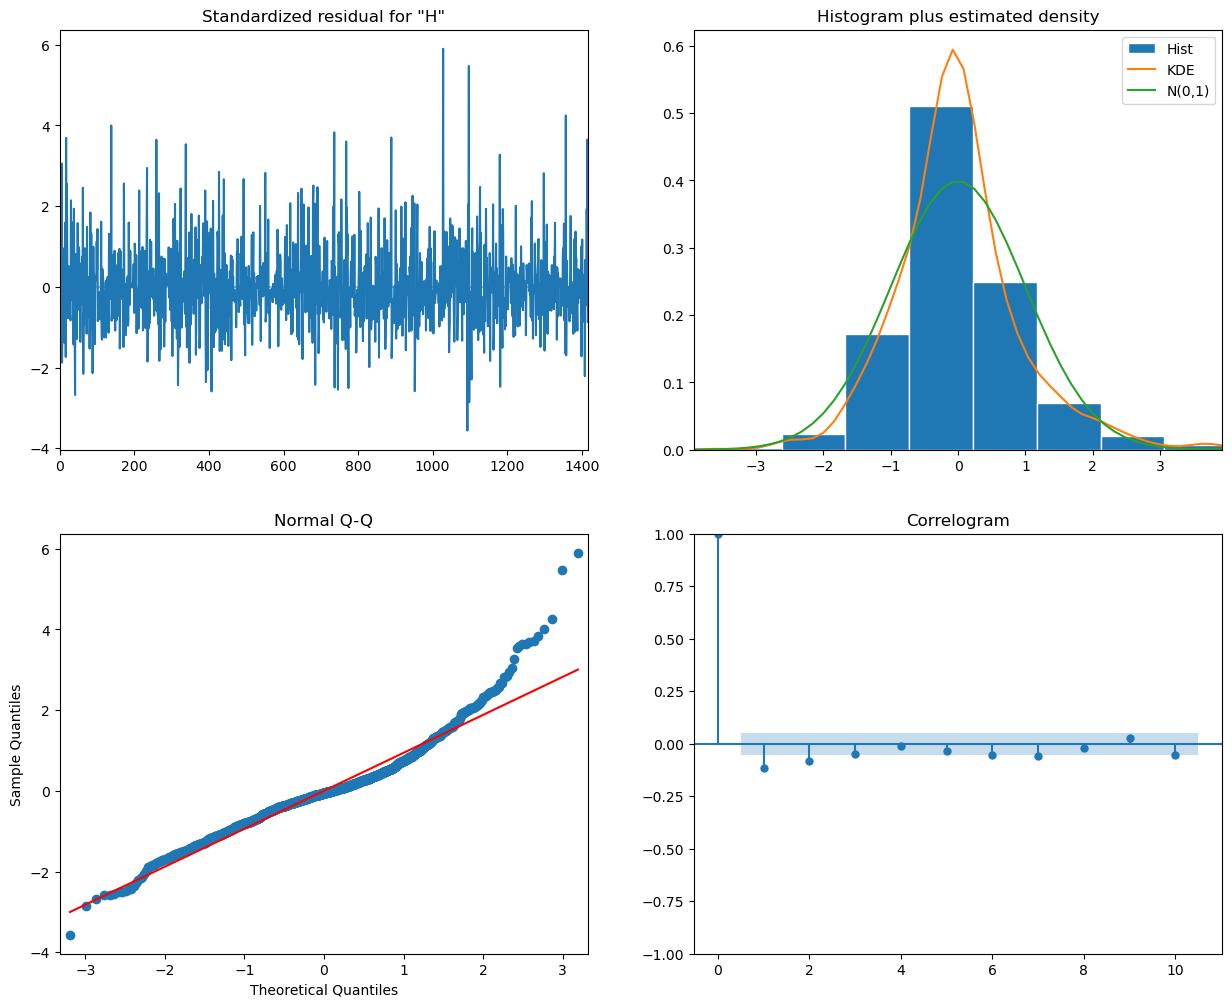

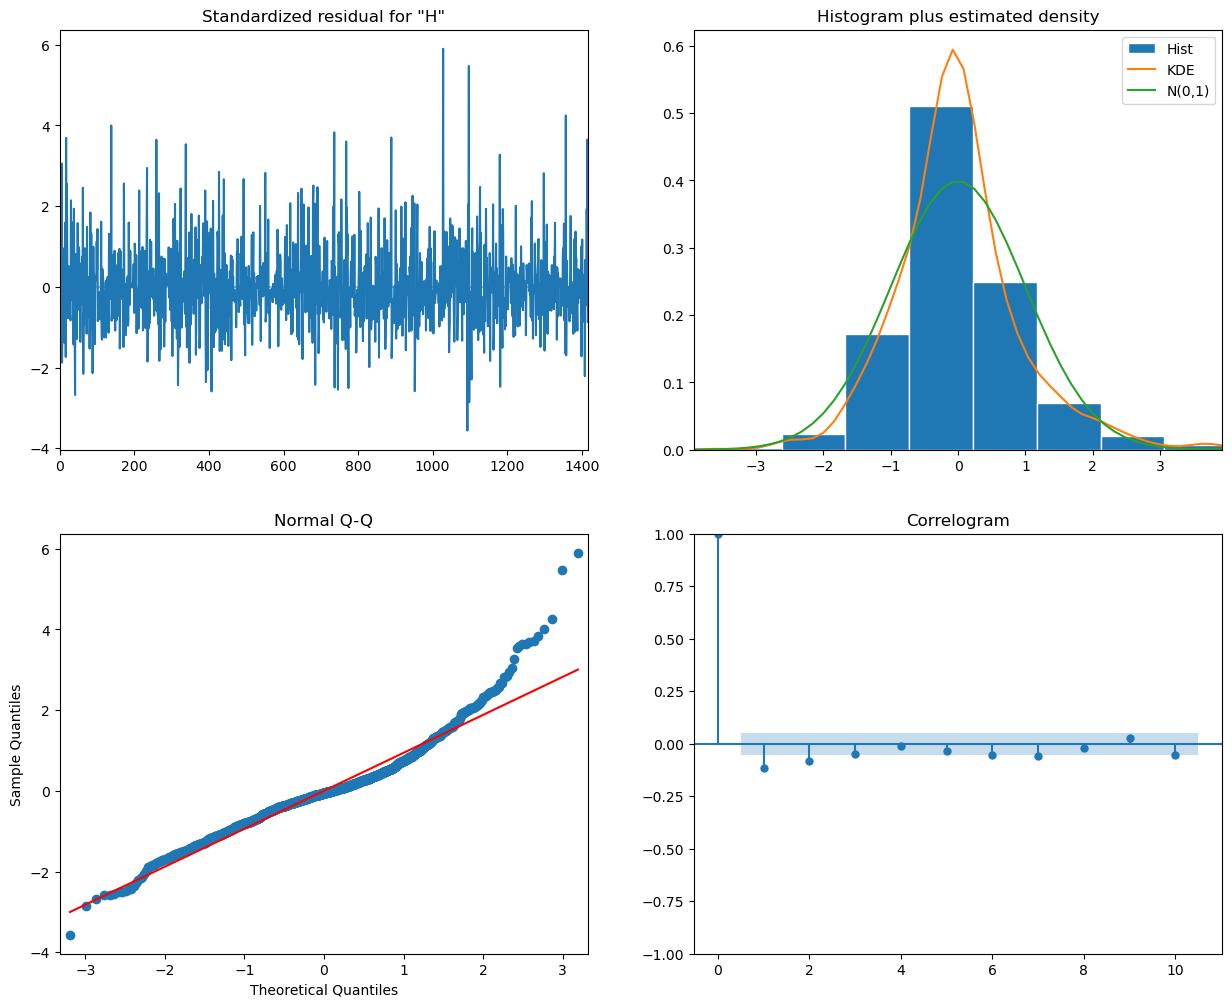

In [153]:
Colombo_proper_model = auto_arima(Colombo_proper_train['HCHO reading'], seasonal=True, trace=True, m=12)
p,d,q = Colombo_proper_model.order
print(p,d,q)
Colombo_proper_arima = ARIMA(Colombo_proper_train['HCHO reading'], order=(p,d,q))
Colombo_proper_arima_fit = Colombo_proper_arima.fit()
print(Colombo_proper_arima_fit.summary())
Colombo_proper_arima_fit.plot_diagnostics(figsize=(15,12))

In [110]:
Colombo_proper_test_preds_sarima = Colombo_proper_arima_fit.forecast(steps=len(Colombo_proper_test))
Colombo_proper_sarima_mse = mean_squared_error(Colombo_proper_test['HCHO reading'], Colombo_proper_test_preds_sarima)
print(f'ARIMA MSE for Colombo_proper: {Colombo_proper_sarima_mse}')
print(Colombo_proper_test_preds_sarima)

ARIMA MSE for Colombo_proper: 1.2449005624439747e-08
1419    0.000246
1420    0.000238
1421    0.000240
1422    0.000242
1423    0.000242
          ...   
1769    0.000242
1770    0.000242
1771    0.000242
1772    0.000242
1773    0.000242
Name: predicted_mean, Length: 355, dtype: float64


In [111]:
forcast_range = 45
forcasting_index = pd.date_range(start=Colombo_proper['Current Date'].max(),periods=forcast_range+1,freq='D')[1:]
forcasted_HCHO = Colombo_proper_arima_fit.forecast(steps=forcast_range)
Colombo_proper_forcast = pd.DataFrame({'Current Date': forcasting_index, 'HCHO_value': forcasted_HCHO, 'City':'Colombo_proper'})
Colombo_proper_forcast.set_index('Current Date',inplace=True)
Colombo_proper_forcast

,HCHO_value,City
Current Date,,
2024-01-01,0.000246,Colombo_proper
2024-01-02,0.000238,Colombo_proper
2024-01-03,0.000240,Colombo_proper
2024-01-04,0.000242,Colombo_proper
2024-01-05,0.000242,Colombo_proper
2024-01-06,0.000242,Colombo_proper
2024-01-07,0.000242,Colombo_proper
2024-01-08,0.000242,Colombo_proper
2024-01-09,0.000242,Colombo_proper


In [112]:
folder = 'Forecast'

if not os.path.exists(folder):
    os.makedirs(folder)

Colombo_proper_forcast.to_csv('Forecast/Colombo_proper_forecast.csv')

## Deniyaya, Matara

In [113]:
Matara_proper = pd.read_csv('Deniyaya, Matara_data.csv')
Matara_proper

,HCHO reading,Location,Current Date,Next Date
0,0.000130,"Deniyaya, Matara",2019-01-01,2019-01-02
1,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
2,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04
3,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05
4,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06
...,...,...,...,...
1706,0.000228,"Deniyaya, Matara",2023-12-27,2023-12-28
1707,0.000096,"Deniyaya, Matara",2023-12-28,2023-12-29
1708,0.000096,"Deniyaya, Matara",2023-12-29,2023-12-30
1709,0.000116,"Deniyaya, Matara",2023-12-30,2023-12-31


In [114]:
drop_col = ['Location','Next Date']
Matara_proper.drop(drop_col,axis=1, inplace=True)
Matara_proper

,HCHO reading,Current Date
0,0.000130,2019-01-01
1,0.000006,2019-01-02
2,0.000236,2019-01-03
3,0.000064,2019-01-04
4,0.000053,2019-01-05
...,...,...
1706,0.000228,2023-12-27
1707,0.000096,2023-12-28
1708,0.000096,2023-12-29
1709,0.000116,2023-12-30


In [115]:
Matara_proper['Current Date'] = pd.to_datetime(Matara_proper['Current Date'])
Matara_proper.dtypes

HCHO reading           float64
Current Date    datetime64[ns]
dtype: object

In [116]:
split_Matara_proper = int(len(Matara_proper) * 0.8)
Matara_proper_train, Matara_proper_test = Matara_proper.iloc[:split_Matara_proper], Matara_proper.iloc[split_Matara_proper:]

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-22335.308, Time=3.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-22386.200, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-21949.200, Time=0.96 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-22418.458, Time=1.49 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-20816.992, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-22413.653, Time=0.65 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-22260.926, Time=3.03 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-22422.535, Time=3.28 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-22050.289, Time=6.64 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-22399.278, Time=2.97 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-22445.707, Time=3.78 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-22445.405, Time=1.15 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=-22364.425, Time=8.61 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-22171.848, Time=2.77 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept

c:\Users\sethr\Ana\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1368
Model:                 ARIMA(5, 0, 0)   Log Likelihood               11255.936
Date:                Sun, 21 Apr 2024   AIC                         -22497.872
Time:                        15:58:50   BIC                         -22461.325
Sample:                             0   HQIC                        -22484.194
                               - 1368                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.915e-05   4.65e-06     21.324      0.000       9e-05       0.000
ar.L1          0.1476    4.7e-11   3.14e+09      0.000       0.148       0.148
ar.L2          0.0842   4.37e-11   1.93e+09      0.0

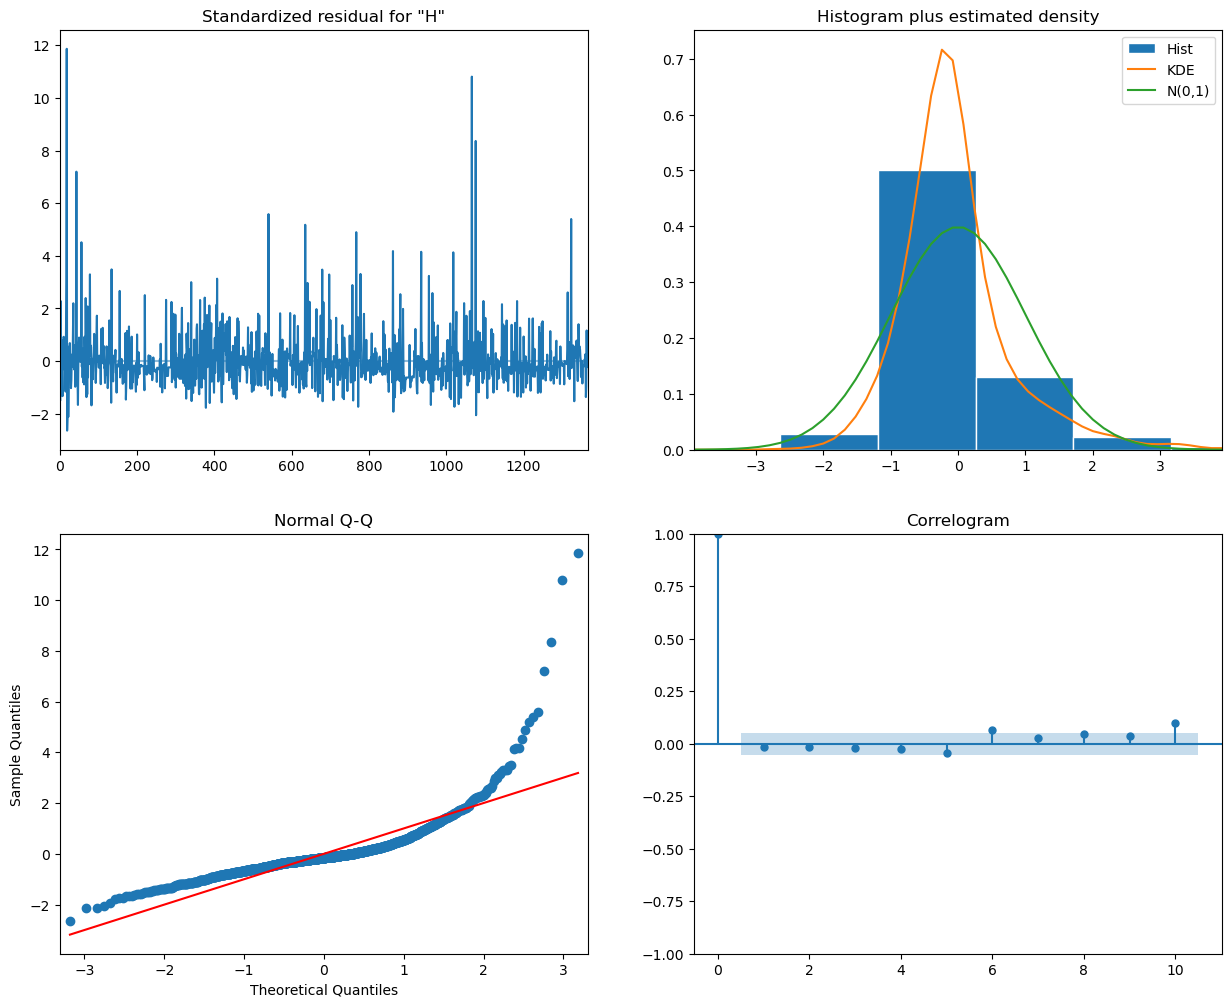

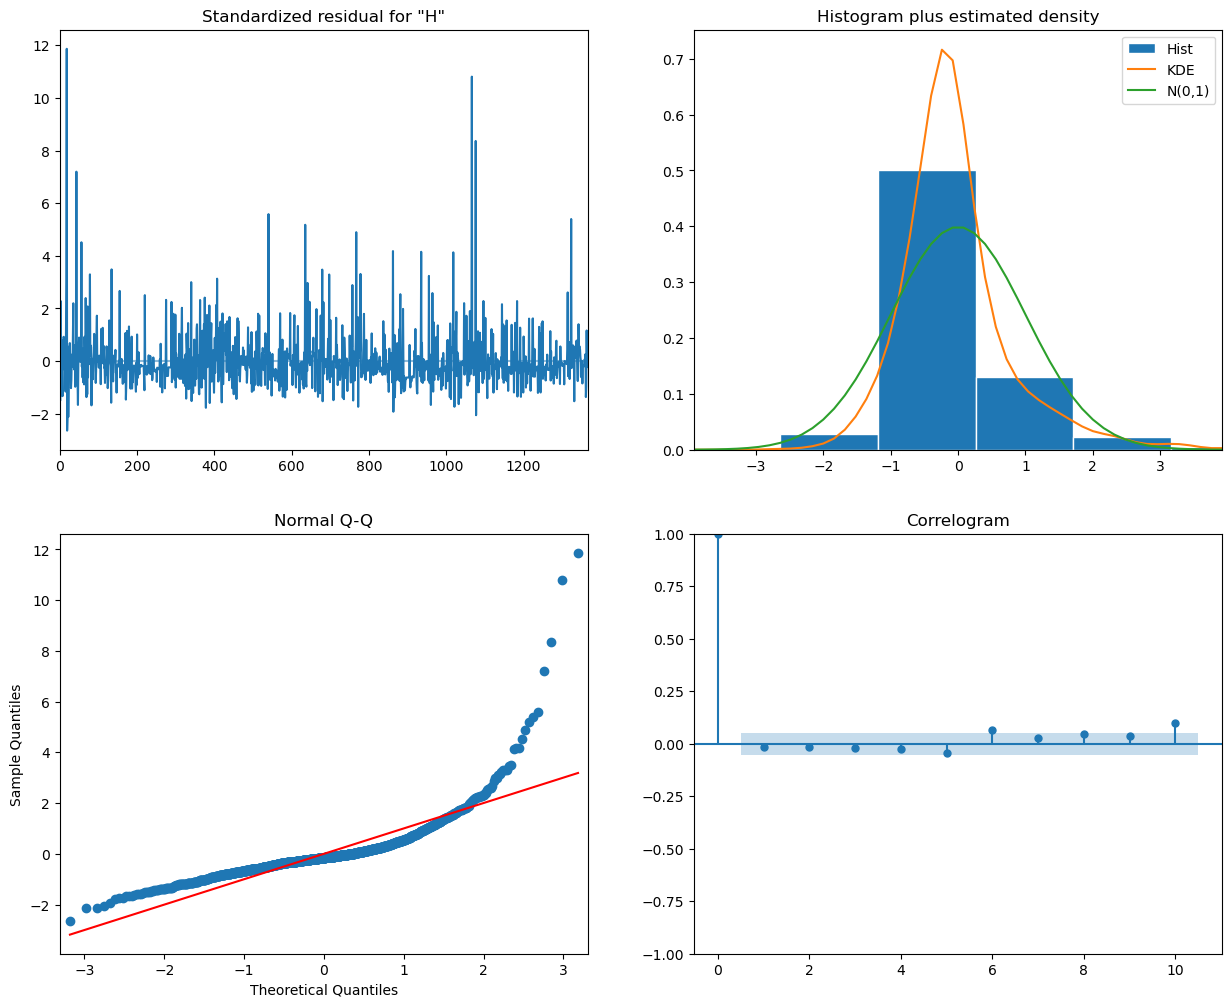

In [117]:
Matara_proper_model = auto_arima(Matara_proper_train['HCHO reading'], seasonal=True, trace=True, m=12)
p,d,q = Matara_proper_model.order
print(p,d,q)
Matara_proper_arima = ARIMA(Matara_proper_train['HCHO reading'], order=(p,d,q))
Matara_proper_arima_fit = Matara_proper_arima.fit()
print(Matara_proper_arima_fit.summary())
Matara_proper_arima_fit.plot_diagnostics(figsize=(15,12))

In [118]:
Matara_proper_test_preds_sarima = Matara_proper_arima_fit.forecast(steps=len(Matara_proper_test))
Matara_proper_sarima_mse = mean_squared_error(Matara_proper_test['HCHO reading'], Matara_proper_test_preds_sarima)
print(f'ARIMA MSE for Matara_proper: {Matara_proper_sarima_mse}')
print(Matara_proper_test_preds_sarima)

ARIMA MSE for Matara_proper: 3.7965284355452705e-09
1368    0.000098
1369    0.000091
1370    0.000092
1371    0.000093
1372    0.000094
          ...   
1706    0.000099
1707    0.000099
1708    0.000099
1709    0.000099
1710    0.000099
Name: predicted_mean, Length: 343, dtype: float64


In [119]:
forcast_range = 45
forcasting_index = pd.date_range(start=Matara_proper['Current Date'].max(),periods=forcast_range+1,freq='D')[1:]
forcasted_HCHO = Matara_proper_arima_fit.forecast(steps=forcast_range)
Matara_proper_forcast = pd.DataFrame({'Current Date': forcasting_index, 'HCHO_value': forcasted_HCHO, 'City':'Matara_proper'})
Matara_proper_forcast.set_index('Current Date',inplace=True)
Matara_proper_forcast

,HCHO_value,City
Current Date,,
2024-01-01,0.000098,Matara_proper
2024-01-02,0.000091,Matara_proper
2024-01-03,0.000092,Matara_proper
2024-01-04,0.000093,Matara_proper
2024-01-05,0.000094,Matara_proper
2024-01-06,0.000097,Matara_proper
2024-01-07,0.000097,Matara_proper
2024-01-08,0.000097,Matara_proper
2024-01-09,0.000097,Matara_proper


In [120]:
folder = 'Forecast'

if not os.path.exists(folder):
    os.makedirs(folder)

Matara_proper_forcast.to_csv('Forecast/Matara_proper_forecast.csv')

## Jaffna

In [121]:
Jaffna_proper = pd.read_csv('Jaffna Proper_data.csv')
Jaffna_proper

,HCHO reading,Location,Current Date,Next Date
0,0.000058,Jaffna Proper,2019-01-01,2019-01-02
1,0.000102,Jaffna Proper,2019-01-02,2019-01-03
2,0.000039,Jaffna Proper,2019-01-03,2019-01-04
3,0.000159,Jaffna Proper,2019-01-05,2019-01-06
4,0.000075,Jaffna Proper,2019-01-06,2019-01-07
...,...,...,...,...
1764,0.000075,Jaffna Proper,2023-12-27,2023-12-28
1765,0.000051,Jaffna Proper,2023-12-28,2023-12-29
1766,0.000127,Jaffna Proper,2023-12-29,2023-12-30
1767,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [122]:
drop_col = ['Location','Next Date']
Jaffna_proper.drop(drop_col,axis=1, inplace=True)
Jaffna_proper

,HCHO reading,Current Date
0,0.000058,2019-01-01
1,0.000102,2019-01-02
2,0.000039,2019-01-03
3,0.000159,2019-01-05
4,0.000075,2019-01-06
...,...,...
1764,0.000075,2023-12-27
1765,0.000051,2023-12-28
1766,0.000127,2023-12-29
1767,0.000117,2023-12-30


In [123]:
Jaffna_proper['Current Date'] = pd.to_datetime(Jaffna_proper['Current Date'])
Jaffna_proper.dtypes

HCHO reading           float64
Current Date    datetime64[ns]
dtype: object

In [124]:
split_Jaffna_proper = int(len(Jaffna_proper) * 0.8)
Jaffna_proper_train, Jaffna_proper_test = Jaffna_proper.iloc[:split_Jaffna_proper], Jaffna_proper.iloc[split_Jaffna_proper:]

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-23196.378, Time=5.87 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-23280.617, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-22805.372, Time=1.52 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-23336.710, Time=1.29 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-21326.310, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-23327.188, Time=0.62 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-22964.251, Time=4.86 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-23341.151, Time=3.17 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-23134.189, Time=6.34 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-23294.073, Time=2.84 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-23371.394, Time=4.62 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-23366.391, Time=1.97 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=-22865.022, Time=12.77 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-23270.346, Time=3.87 sec
 ARIMA(1,0,0)(0,0,2)[12] intercep

c:\Users\sethr\Ana\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1415
Model:                 ARIMA(5, 0, 0)   Log Likelihood               11696.271
Date:                Sun, 21 Apr 2024   AIC                         -23378.543
Time:                        16:01:27   BIC                         -23341.759
Sample:                             0   HQIC                        -23364.800
                               - 1415                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   3.56e-06     31.407      0.000       0.000       0.000
ar.L1          0.1953   7.98e-11   2.45e+09      0.000       0.195       0.195
ar.L2          0.0769   5.23e-11   1.47e+09      0.0

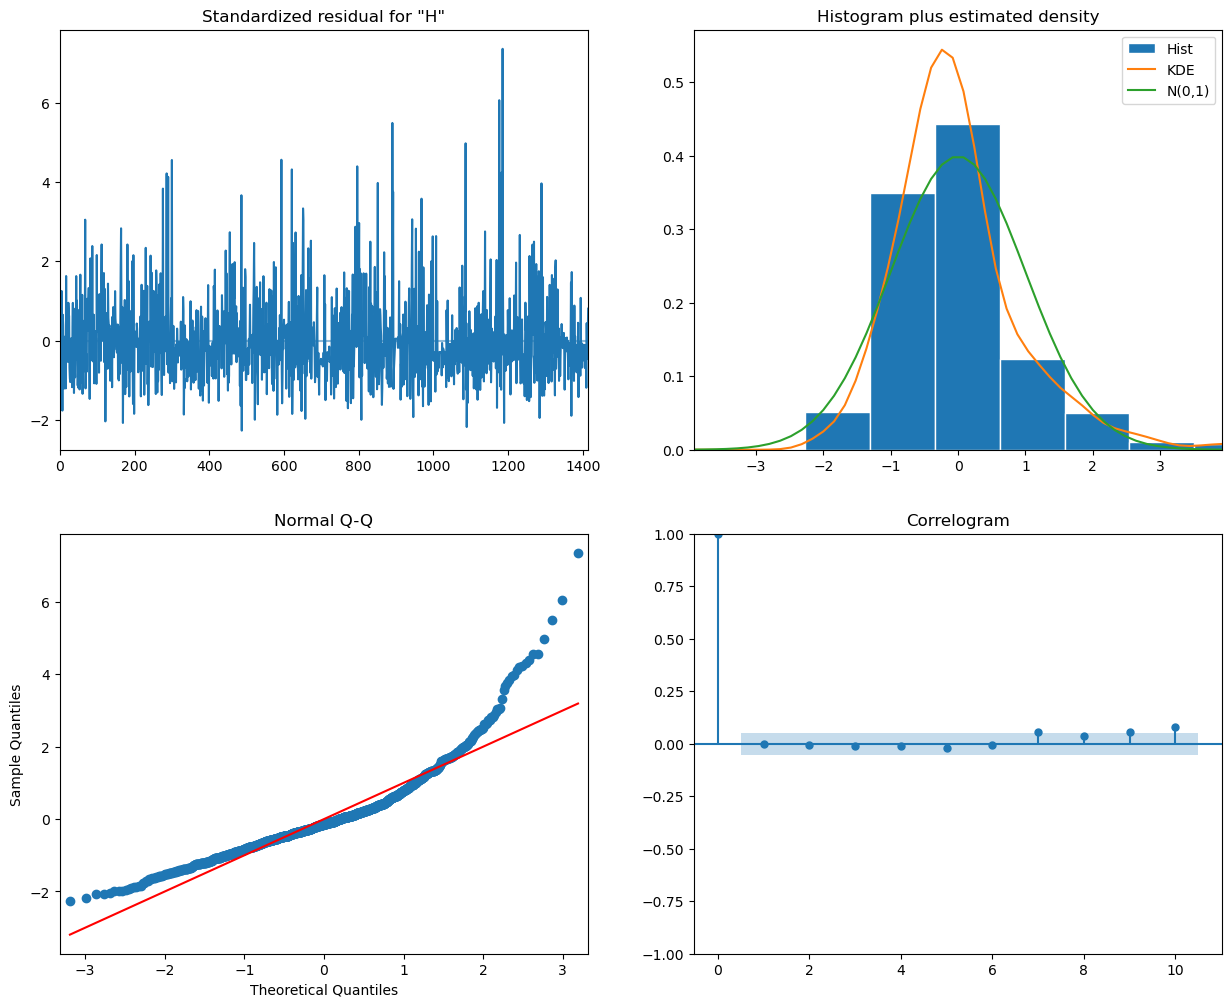

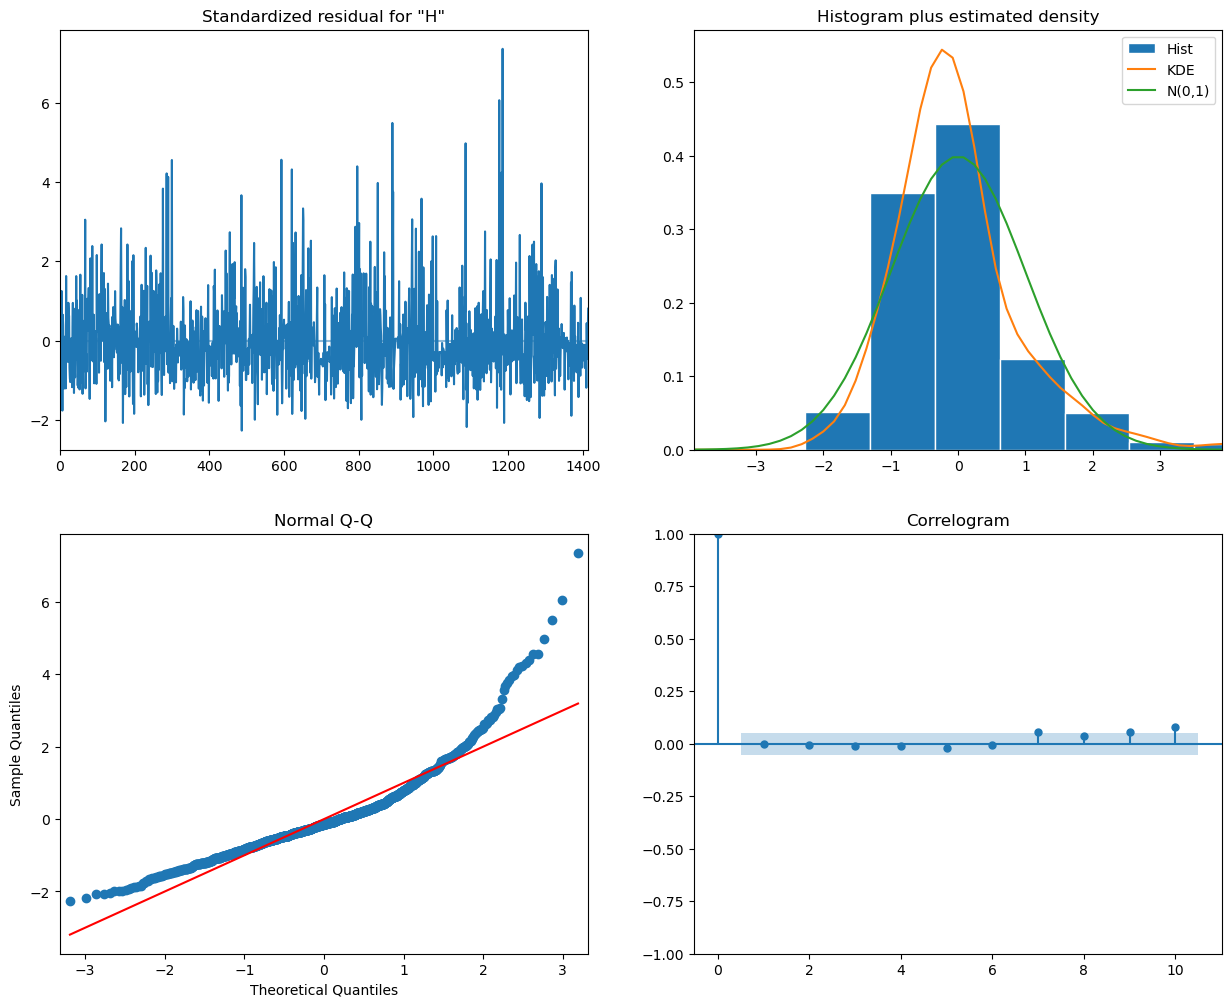

In [125]:
Jaffna_proper_model = auto_arima(Jaffna_proper_train['HCHO reading'], seasonal=True, trace=True, m=12)
p,d,q = Jaffna_proper_model.order
print(p,d,q)
Jaffna_proper_arima = ARIMA(Jaffna_proper_train['HCHO reading'], order=(p,d,q))
Jaffna_proper_arima_fit = Jaffna_proper_arima.fit()
print(Jaffna_proper_arima_fit.summary())
Jaffna_proper_arima_fit.plot_diagnostics(figsize=(15,12))

In [126]:
Jaffna_proper_test_preds_sarima = Jaffna_proper_arima_fit.forecast(steps=len(Jaffna_proper_test))
Jaffna_proper_sarima_mse = mean_squared_error(Jaffna_proper_test['HCHO reading'], Jaffna_proper_test_preds_sarima)
print(f'ARIMA MSE for Jaffna_proper: {Jaffna_proper_sarima_mse}')
print(Jaffna_proper_test_preds_sarima)

ARIMA MSE for Jaffna_proper: 4.45852648357985e-09
1415    0.000118
1416    0.000115
1417    0.000115
1418    0.000116
1419    0.000115
          ...   
1764    0.000112
1765    0.000112
1766    0.000112
1767    0.000112
1768    0.000112
Name: predicted_mean, Length: 354, dtype: float64


In [127]:
forcast_range = 45
forcasting_index = pd.date_range(start=Jaffna_proper['Current Date'].max(),periods=forcast_range+1,freq='D')[1:]
forcasted_HCHO = Jaffna_proper_arima_fit.forecast(steps=forcast_range)
Jaffna_proper_forcast = pd.DataFrame({'Current Date': forcasting_index, 'HCHO_value': forcasted_HCHO, 'City':'Jaffna_proper'})
Jaffna_proper_forcast.set_index('Current Date',inplace=True)
Jaffna_proper_forcast

,HCHO_value,City
Current Date,,
2024-01-01,0.000118,Jaffna_proper
2024-01-02,0.000115,Jaffna_proper
2024-01-03,0.000115,Jaffna_proper
2024-01-04,0.000116,Jaffna_proper
2024-01-05,0.000115,Jaffna_proper
2024-01-06,0.000113,Jaffna_proper
2024-01-07,0.000113,Jaffna_proper
2024-01-08,0.000113,Jaffna_proper
2024-01-09,0.000112,Jaffna_proper


In [128]:
folder = 'Forecast'

if not os.path.exists(folder):
    os.makedirs(folder)

Jaffna_proper_forcast.to_csv('Forecast/Jaffna_proper_forecast.csv')

## Kandy

In [129]:
Kandy_proper = pd.read_csv('Kandy Proper_data.csv')
Kandy_proper

,HCHO reading,Location,Current Date,Next Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,0.000095,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1713,0.000057,Kandy Proper,2023-12-27,2023-12-28
1714,0.000057,Kandy Proper,2023-12-28,2023-12-29
1715,0.000057,Kandy Proper,2023-12-29,2023-12-30
1716,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [130]:
drop_col = ['Location','Next Date']
Kandy_proper.drop(drop_col,axis=1, inplace=True)
Kandy_proper

,HCHO reading,Current Date
0,0.000176,2019-01-01
1,0.000092,2019-01-02
2,0.000095,2019-01-03
3,0.000191,2019-01-04
4,0.000122,2019-01-05
...,...,...
1713,0.000057,2023-12-27
1714,0.000057,2023-12-28
1715,0.000057,2023-12-29
1716,0.000056,2023-12-30


In [131]:
Kandy_proper['Current Date'] = pd.to_datetime(Kandy_proper['Current Date'])
Kandy_proper.dtypes

HCHO reading           float64
Current Date    datetime64[ns]
dtype: object

In [132]:
split_Kandy_proper = int(len(Kandy_proper) * 0.8)
Kandy_proper_train, Kandy_proper_test = Kandy_proper.iloc[:split_Kandy_proper], Kandy_proper.iloc[split_Kandy_proper:]

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-22854.779, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-22211.060, Time=0.18 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-22578.836, Time=1.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-22840.412, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-22213.007, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-22856.775, Time=1.04 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-22858.551, Time=0.60 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-22856.774, Time=0.97 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-17584.428, Time=1.60 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-22829.316, Time=2.16 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-22876.235, Time=0.56 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=-22875.022, Time=1.07 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=-22874.883, Time=1.09 sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=-22872.888, Time=1.18 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept

c:\Users\sethr\Ana\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1374
Model:                 ARIMA(4, 1, 2)   Log Likelihood               11420.820
Date:                Sun, 21 Apr 2024   AIC                         -22827.640
Time:                        16:02:10   BIC                         -22791.067
Sample:                             0   HQIC                        -22813.955
                               - 1374                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7163   8.56e-20  -8.37e+18      0.000      -0.716      -0.716
ar.L2          0.2593   1.35e-20   1.92e+19      0.000       0.259       0.259
ar.L3          0.1691   7.13e-20   2.37e+18      0.0

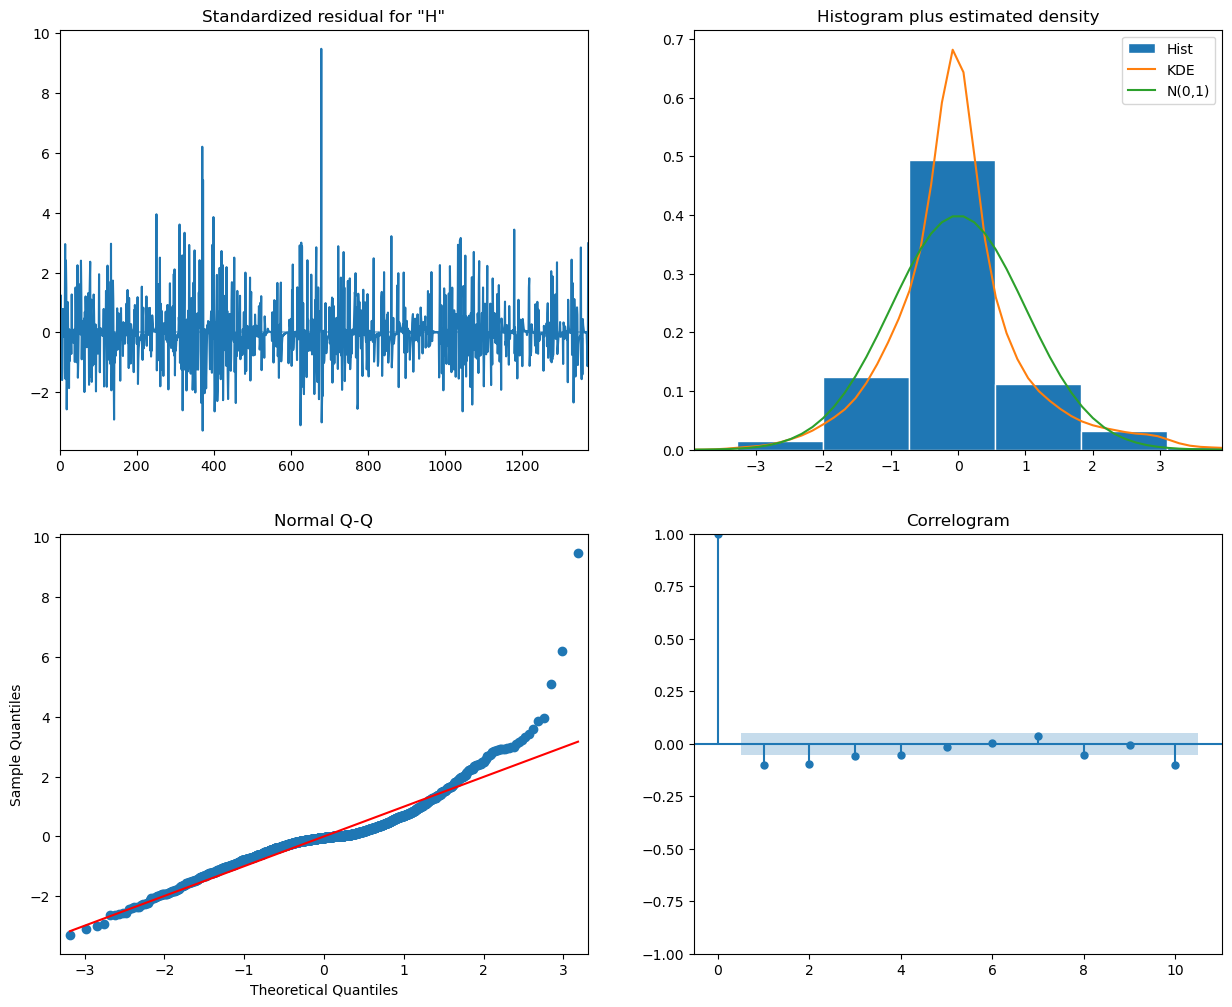

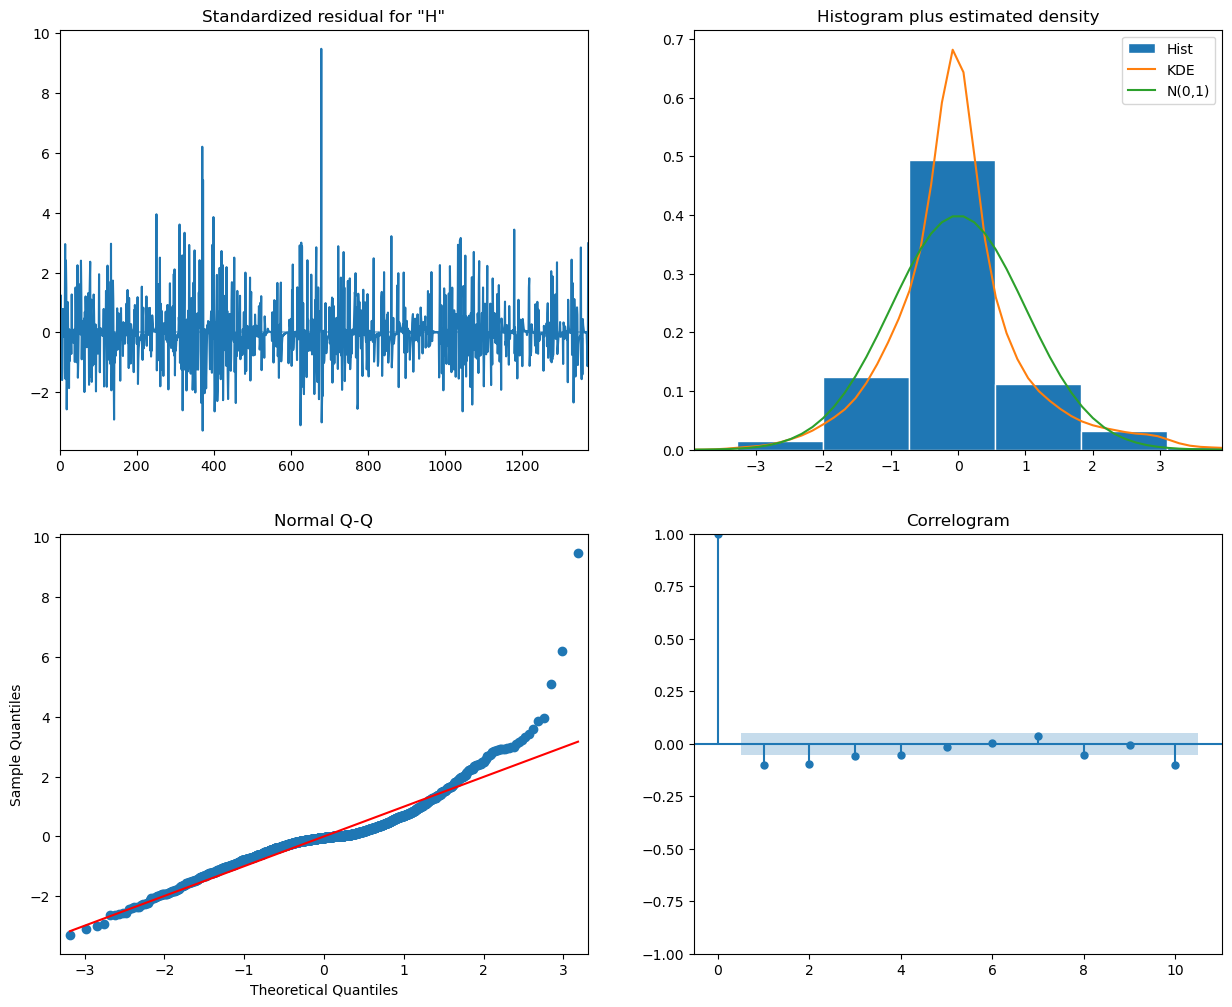

In [133]:
Kandy_proper_model = auto_arima(Kandy_proper_train['HCHO reading'], seasonal=True, trace=True, m=12)
p,d,q = Kandy_proper_model.order
print(p,d,q)
Kandy_proper_arima = ARIMA(Kandy_proper_train['HCHO reading'], order=(p,d,q))
Kandy_proper_arima_fit = Kandy_proper_arima.fit()
print(Kandy_proper_arima_fit.summary())
Kandy_proper_arima_fit.plot_diagnostics(figsize=(15,12))

In [134]:
Kandy_proper_test_preds_sarima = Kandy_proper_arima_fit.forecast(steps=len(Kandy_proper_test))
Kandy_proper_sarima_mse = mean_squared_error(Kandy_proper_test['HCHO reading'], Kandy_proper_test_preds_sarima)
print(f'ARIMA MSE for Kandy_proper: {Kandy_proper_sarima_mse}')
print(Kandy_proper_test_preds_sarima)

ARIMA MSE for Kandy_proper: 3.2993472163395473e-09
1374    0.000100
1375    0.000110
1376    0.000107
1377    0.000106
1378    0.000100
          ...   
1713    0.000101
1714    0.000101
1715    0.000101
1716    0.000101
1717    0.000101
Name: predicted_mean, Length: 344, dtype: float64


In [135]:
forcast_range = 45
forcasting_index = pd.date_range(start=Kandy_proper['Current Date'].max(),periods=forcast_range+1,freq='D')[1:]
forcasted_HCHO = Kandy_proper_arima_fit.forecast(steps=forcast_range)
Kandy_proper_forcast = pd.DataFrame({'Current Date': forcasting_index, 'HCHO_value': forcasted_HCHO, 'City':'Kandy_proper'})
Kandy_proper_forcast.set_index('Current Date',inplace=True)
Kandy_proper_forcast

,HCHO_value,City
Current Date,,
2024-01-01,0.000100,Kandy_proper
2024-01-02,0.000110,Kandy_proper
2024-01-03,0.000107,Kandy_proper
2024-01-04,0.000106,Kandy_proper
2024-01-05,0.000100,Kandy_proper
2024-01-06,0.000104,Kandy_proper
2024-01-07,0.000099,Kandy_proper
2024-01-08,0.000103,Kandy_proper
2024-01-09,0.000099,Kandy_proper


In [136]:
folder = 'Forecast'

if not os.path.exists(folder):
    os.makedirs(folder)

Kandy_proper_forcast.to_csv('Forecast/Kandy_proper_forecast.csv')

## Kurunegala

In [137]:
Kurunegala_proper = pd.read_csv('Kurunegala Proper_data.csv')
Kurunegala_proper

,HCHO reading,Location,Current Date,Next Date
0,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
1,0.000137,Kurunegala Proper,2019-01-02,2019-01-03
2,0.000148,Kurunegala Proper,2019-01-03,2019-01-04
3,0.000249,Kurunegala Proper,2019-01-05,2019-01-06
4,0.000102,Kurunegala Proper,2019-01-06,2019-01-07
...,...,...,...,...
1765,0.000075,Kurunegala Proper,2023-12-27,2023-12-28
1766,0.000094,Kurunegala Proper,2023-12-28,2023-12-29
1767,0.000094,Kurunegala Proper,2023-12-29,2023-12-30
1768,0.000158,Kurunegala Proper,2023-12-30,2023-12-31


In [138]:
drop_col = ['Location','Next Date']
Kurunegala_proper.drop(drop_col,axis=1, inplace=True)
Kurunegala_proper

,HCHO reading,Current Date
0,0.000088,2019-01-01
1,0.000137,2019-01-02
2,0.000148,2019-01-03
3,0.000249,2019-01-05
4,0.000102,2019-01-06
...,...,...
1765,0.000075,2023-12-27
1766,0.000094,2023-12-28
1767,0.000094,2023-12-29
1768,0.000158,2023-12-30


In [139]:
Kurunegala_proper['Current Date'] = pd.to_datetime(Kurunegala_proper['Current Date'])
Kurunegala_proper.dtypes

HCHO reading           float64
Current Date    datetime64[ns]
dtype: object

In [140]:
split_Kurunegala_proper = int(len(Kurunegala_proper) * 0.8)
Kurunegala_proper_train, Kurunegala_proper_test = Kurunegala_proper.iloc[:split_Kurunegala_proper], Kurunegala_proper.iloc[split_Kurunegala_proper:]

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-23452.479, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-22761.623, Time=0.22 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-23087.576, Time=1.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-23387.996, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-22763.598, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-23454.482, Time=0.98 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-23455.719, Time=0.52 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-23454.478, Time=0.89 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-23447.565, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-23425.284, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-23445.664, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=-23457.028, Time=1.22 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=-23456.059, Time=3.50 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=-23456.170, Time=3.72 sec
 ARIMA(2,1,3)(1,0,1)[12] intercept

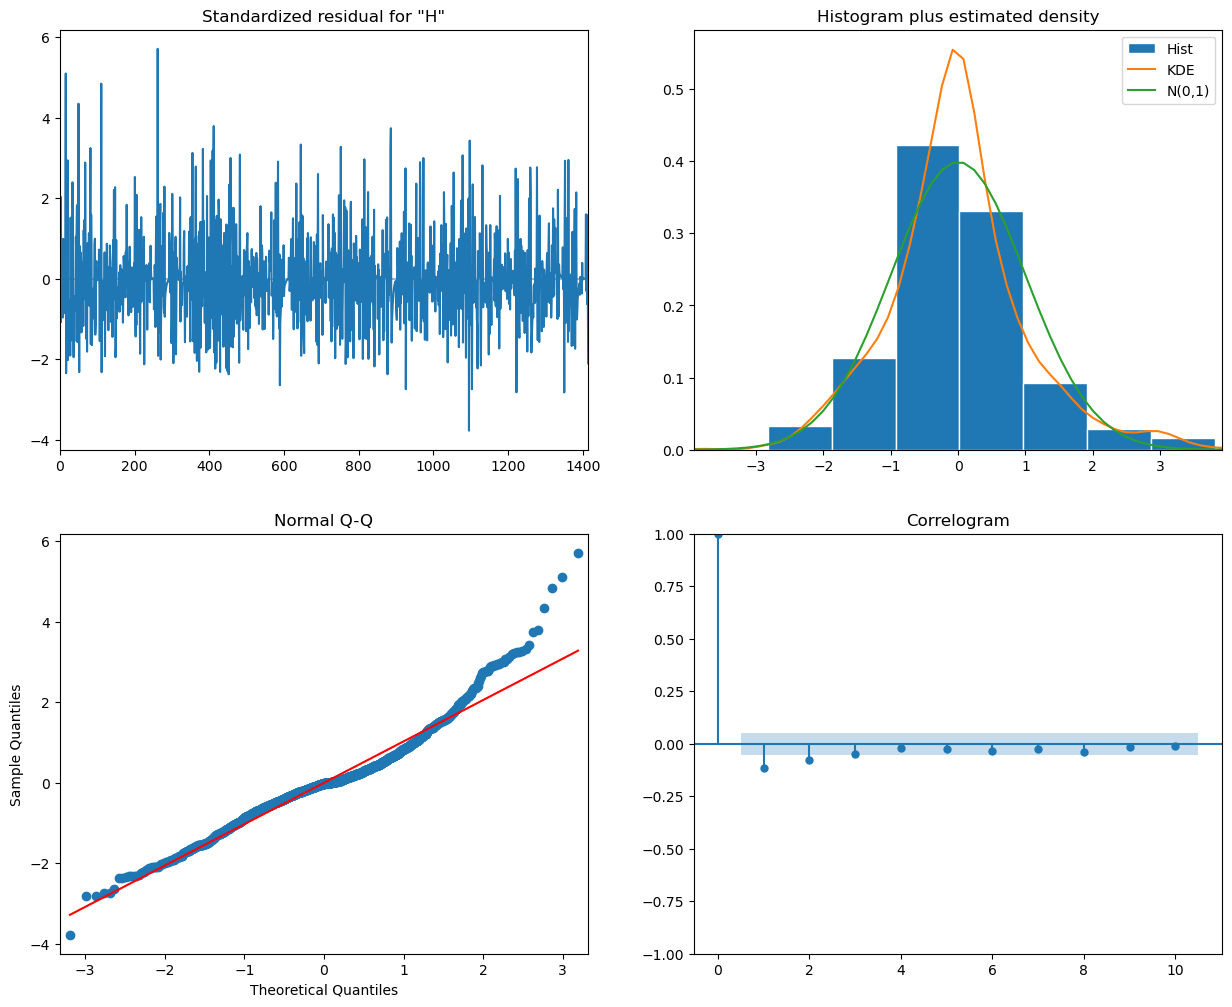

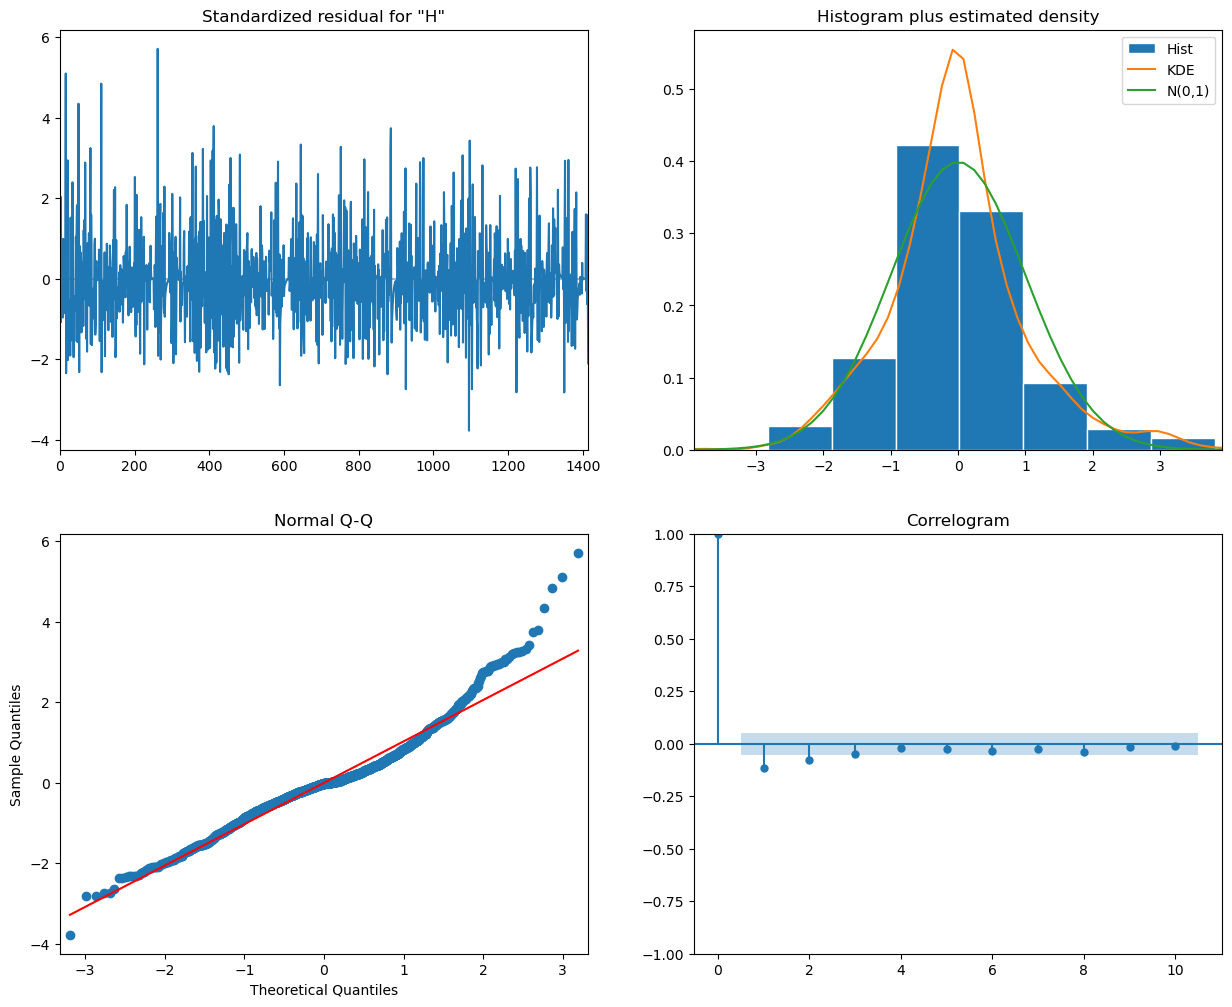

In [141]:
Kurunegala_proper_model = auto_arima(Kurunegala_proper_train['HCHO reading'], seasonal=True, trace=True, m=12)
p,d,q = Kurunegala_proper_model.order
print(p,d,q)
Kurunegala_proper_arima = ARIMA(Kurunegala_proper_train['HCHO reading'], order=(p,d,q))
Kurunegala_proper_arima_fit = Kurunegala_proper_arima.fit()
print(Kurunegala_proper_arima_fit.summary())
Kurunegala_proper_arima_fit.plot_diagnostics(figsize=(15,12))

In [142]:
Kurunegala_proper_test_preds_sarima = Kurunegala_proper_arima_fit.forecast(steps=len(Kurunegala_proper_test))
Kurunegala_proper_sarima_mse = mean_squared_error(Kurunegala_proper_test['HCHO reading'], Kurunegala_proper_test_preds_sarima)
print(f'ARIMA MSE for Kurunegala_proper: {Kurunegala_proper_sarima_mse}')
print(Kurunegala_proper_test_preds_sarima)

ARIMA MSE for Kurunegala_proper: 5.984465610186335e-09
1416    0.000086
1417    0.000094
1418    0.000095
1419    0.000094
1420    0.000094
          ...   
1765    0.000094
1766    0.000094
1767    0.000094
1768    0.000094
1769    0.000094
Name: predicted_mean, Length: 354, dtype: float64


In [143]:
forcast_range = 45
forcasting_index = pd.date_range(start=Kurunegala_proper['Current Date'].max(),periods=forcast_range+1,freq='D')[1:]
forcasted_HCHO = Kurunegala_proper_arima_fit.forecast(steps=forcast_range)
Kurunegala_proper_forcast = pd.DataFrame({'Current Date': forcasting_index, 'HCHO_value': forcasted_HCHO, 'City':'Kurunegala_proper'})
Kurunegala_proper_forcast.set_index('Current Date',inplace=True)
Kurunegala_proper_forcast

,HCHO_value,City
Current Date,,
2024-01-01,0.000086,Kurunegala_proper
2024-01-02,0.000094,Kurunegala_proper
2024-01-03,0.000095,Kurunegala_proper
2024-01-04,0.000094,Kurunegala_proper
2024-01-05,0.000094,Kurunegala_proper
2024-01-06,0.000094,Kurunegala_proper
2024-01-07,0.000094,Kurunegala_proper
2024-01-08,0.000094,Kurunegala_proper
2024-01-09,0.000094,Kurunegala_proper


In [144]:
folder = 'Forecast'

if not os.path.exists(folder):
    os.makedirs(folder)

Kurunegala_proper_forcast.to_csv('Forecast/Kurunegala_proper_forecast.csv')

## Nuwara Eliya

In [145]:
Nuwara_Eliya_proper = pd.read_csv('Nuwara Eliya Proper_data.csv')
Nuwara_Eliya_proper

,HCHO reading,Location,Current Date,Next Date
0,0.000088,Nuwara Eliya Proper,2019-01-01,2019-01-02
1,0.000088,Nuwara Eliya Proper,2019-01-02,2019-01-03
2,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
3,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
4,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06
...,...,...,...,...
1725,0.000043,Nuwara Eliya Proper,2023-12-27,2023-12-28
1726,0.000043,Nuwara Eliya Proper,2023-12-28,2023-12-29
1727,0.000043,Nuwara Eliya Proper,2023-12-29,2023-12-30
1728,0.000043,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [146]:
drop_col = ['Location','Next Date']
Nuwara_Eliya_proper.drop(drop_col,axis=1, inplace=True)
Nuwara_Eliya_proper

,HCHO reading,Current Date
0,0.000088,2019-01-01
1,0.000088,2019-01-02
2,0.000191,2019-01-03
3,0.000051,2019-01-04
4,0.000065,2019-01-05
...,...,...
1725,0.000043,2023-12-27
1726,0.000043,2023-12-28
1727,0.000043,2023-12-29
1728,0.000043,2023-12-30


In [147]:
Nuwara_Eliya_proper['Current Date'] = pd.to_datetime(Nuwara_Eliya_proper['Current Date'])
Nuwara_Eliya_proper.dtypes

HCHO reading           float64
Current Date    datetime64[ns]
dtype: object

In [148]:
split_Nuwara_Eliya_proper = int(len(Nuwara_Eliya_proper) * 0.8)
Nuwara_Eliya_proper_train, Nuwara_Eliya_proper_test = Nuwara_Eliya_proper.iloc[:split_Nuwara_Eliya_proper], Nuwara_Eliya_proper.iloc[split_Nuwara_Eliya_proper:]

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-23627.755, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-22961.388, Time=0.22 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-23270.759, Time=1.53 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-23557.306, Time=3.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-22963.405, Time=0.15 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-23629.741, Time=8.08 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-23632.065, Time=0.25 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-23630.026, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-23629.160, Time=3.39 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-23558.954, Time=2.47 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-23641.261, Time=1.34 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=-23639.848, Time=2.71 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=-23639.648, Time=2.75 sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=-23637.671, Time=2.93 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept

c:\Users\sethr\Ana\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1384
Model:                 ARIMA(2, 1, 4)   Log Likelihood               11811.318
Date:                Sun, 21 Apr 2024   AIC                         -23608.635
Time:                        16:04:53   BIC                         -23572.011
Sample:                             0   HQIC                        -23594.936
                               - 1384                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7847   4.21e-20  -1.86e+19      0.000      -0.785      -0.785
ar.L2         -0.7929   4.37e-21  -1.81e+20      0.000      -0.793      -0.793
ma.L1         -0.0071    7.5e-20  -9.46e+16      0.0

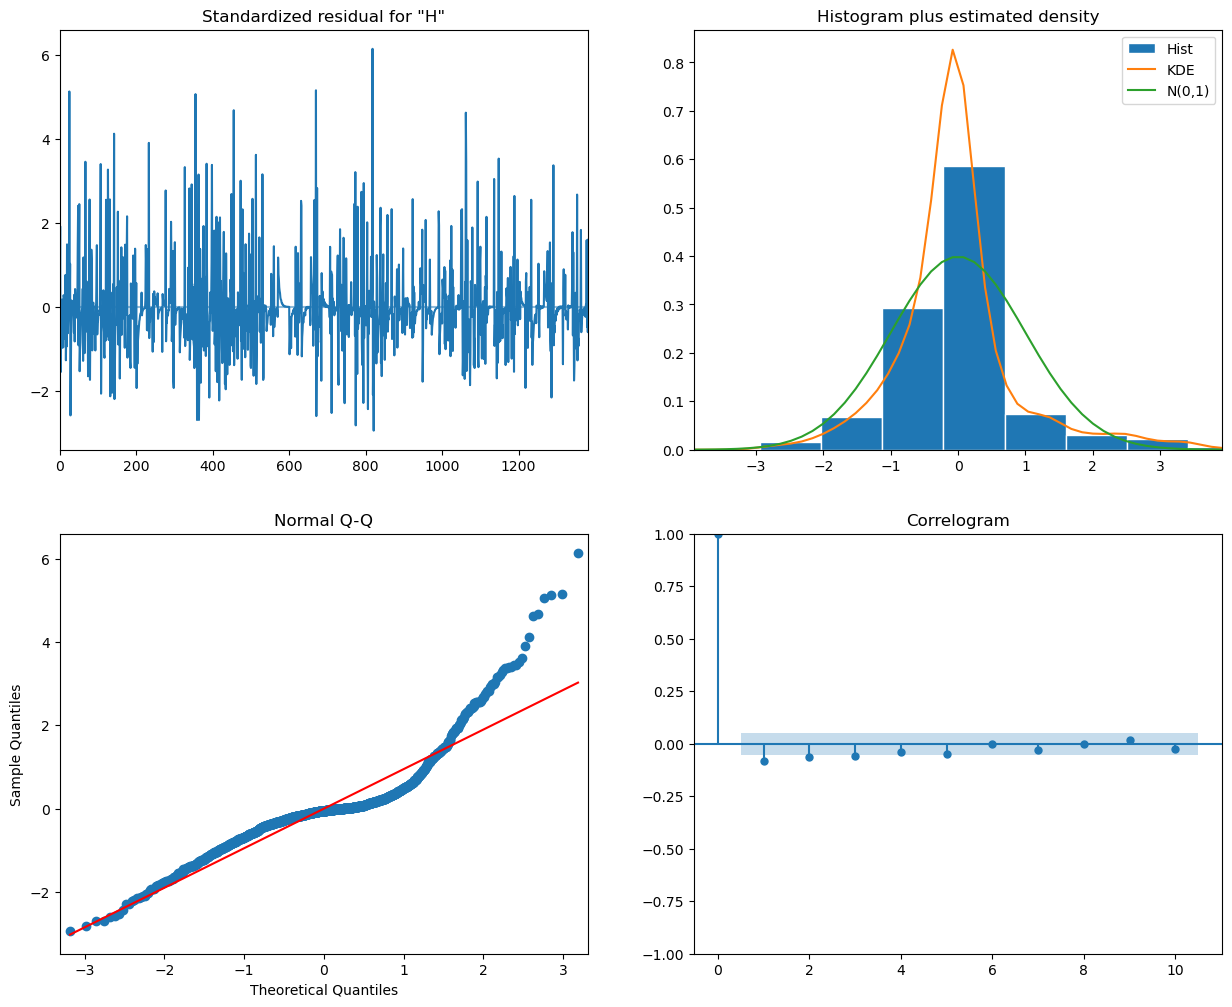

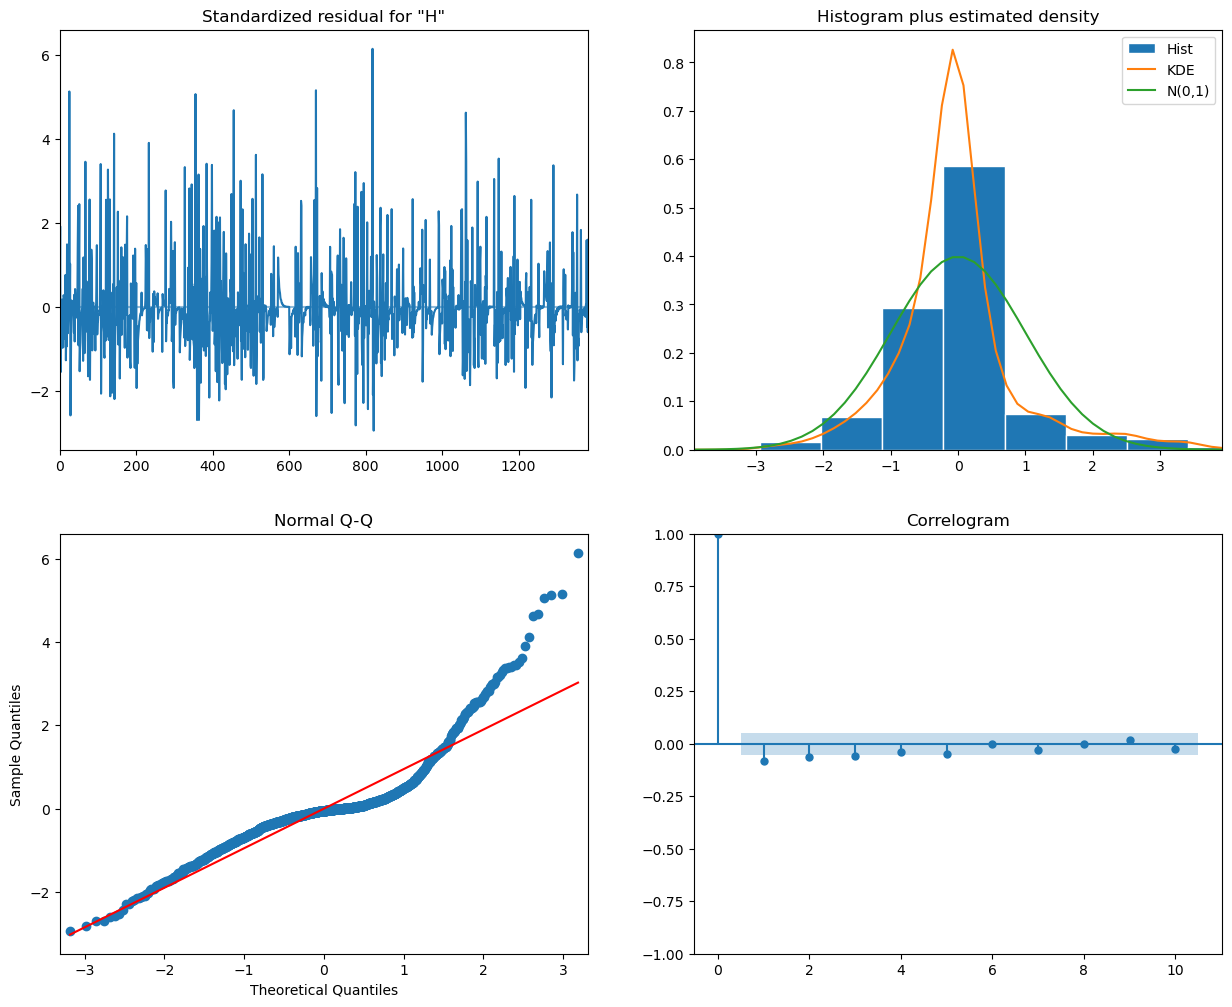

In [149]:
Nuwara_Eliya_proper_model = auto_arima(Nuwara_Eliya_proper_train['HCHO reading'], seasonal=True, trace=True, m=12)
p,d,q = Nuwara_Eliya_proper_model.order
print(p,d,q)
Nuwara_Eliya_proper_arima = ARIMA(Nuwara_Eliya_proper_train['HCHO reading'], order=(p,d,q))
Nuwara_Eliya_proper_arima_fit = Nuwara_Eliya_proper_arima.fit()
print(Nuwara_Eliya_proper_arima_fit.summary())
Nuwara_Eliya_proper_arima_fit.plot_diagnostics(figsize=(15,12))

In [150]:
Nuwara_Eliya_proper_test_preds_sarima = Nuwara_Eliya_proper_arima_fit.forecast(steps=len(Nuwara_Eliya_proper_test))
Nuwara_Eliya_proper_sarima_mse = mean_squared_error(Nuwara_Eliya_proper_test['HCHO reading'], Nuwara_Eliya_proper_test_preds_sarima)
print(f'ARIMA MSE for Nuwara_Eliya_proper: {Nuwara_Eliya_proper_sarima_mse}')
print(Nuwara_Eliya_proper_test_preds_sarima)

ARIMA MSE for Nuwara_Eliya_proper: 2.6901717101307053e-09
1384    0.000070
1385    0.000064
1386    0.000065
1387    0.000063
1388    0.000064
          ...   
1725    0.000064
1726    0.000064
1727    0.000064
1728    0.000064
1729    0.000064
Name: predicted_mean, Length: 346, dtype: float64


In [151]:
forcast_range = 45
forcasting_index = pd.date_range(start=Nuwara_Eliya_proper['Current Date'].max(),periods=forcast_range+1,freq='D')[1:]
forcasted_HCHO = Nuwara_Eliya_proper_arima_fit.forecast(steps=forcast_range)
Nuwara_Eliya_proper_forcast = pd.DataFrame({'Current Date': forcasting_index, 'HCHO_value': forcasted_HCHO, 'City':'Nuwara_Eliya_proper'})
Nuwara_Eliya_proper_forcast.set_index('Current Date',inplace=True)
Nuwara_Eliya_proper_forcast

,HCHO_value,City
Current Date,,
2024-01-01,0.000070,Nuwara_Eliya_proper
2024-01-02,0.000064,Nuwara_Eliya_proper
2024-01-03,0.000065,Nuwara_Eliya_proper
2024-01-04,0.000063,Nuwara_Eliya_proper
2024-01-05,0.000064,Nuwara_Eliya_proper
2024-01-06,0.000065,Nuwara_Eliya_proper
2024-01-07,0.000064,Nuwara_Eliya_proper
2024-01-08,0.000064,Nuwara_Eliya_proper
2024-01-09,0.000065,Nuwara_Eliya_proper


In [152]:
folder = 'Forecast'

if not os.path.exists(folder):
    os.makedirs(folder)

Nuwara_Eliya_proper_forcast.to_csv('Forecast/Nuwara_Eliya_proper_forecast.csv')